In [1]:
import pandas as pd
import numpy as np
import math
from sklearn.linear_model import LinearRegression
data=pd.read_csv("./Data/PricePredictionData.csv",names=["HostelName","No_of_Bed","Ac","Laundry","FoodType","Rating","Security","price"
])


X=data[["No_of_Bed","Ac","Security","FoodType","Rating","Laundry"
]]
y=data.price



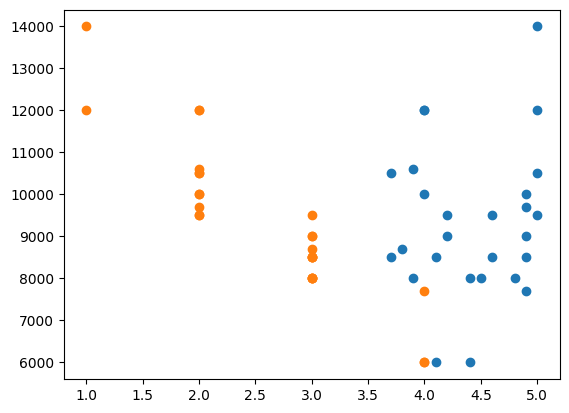

In [2]:
import matplotlib.pyplot as plt
plt.scatter(data["Rating"],data["price"])
plt.scatter(data["No_of_Bed"],data["price"])
plt.show()

In [3]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.1,random_state=10)


In [4]:
from sklearn.linear_model import LinearRegression
lr_clf=LinearRegression()
lr_clf.fit(X_train,Y_train) 
lr_clf.score(X_test,Y_test)


0.7027512602689361

In [5]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
cv=ShuffleSplit(n_splits=4,test_size=0.1,random_state=0)
cross_val_score(LinearRegression(),X,y,cv=cv)


array([0.14620705, 0.982154  , 0.69687944, 0.28504719])

In [6]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model(X,y):
    algos={
        'linear_regression':{
        'model':LinearRegression(),
        'params':{
        'normalize':[True,False]
        }
        },
        'lasso':{
        'model':Lasso(),
        'params':{
        'alpha':[1,2],
        'selection':['random','cyclic']
        }
        },
        'decision_tree':{
        'model':DecisionTreeRegressor(),
        'params':{
        'criterion':['mse','friedman_mse'],
        'splitter':['best','random']
        }
        }
    }
    scores = []

    cv= ShuffleSplit(n_splits=5, test_size=0.2, random_state=0) 
    for algo_name, config in algos.items(): 
        gs= GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False) 
        gs.fit(X,y) 
        scores.append({ "model": algo_name, 'best_score': gs.best_score_, 
                    "best_params": gs.best_params_})

    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])
find_best_model(X,y)

C:\Users\lahar\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
C:\Users\lahar\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.

,model,best_score,best_params
0,linear_regression,0.427938,{'normalize': False}
1,lasso,0.443944,"{'alpha': 2, 'selection': 'random'}"
2,decision_tree,0.192188,"{'criterion': 'mse', 'splitter': 'best'}"


In [7]:
def predict_price(No_of_Bed,Ac,Security,FoodType,Rating,Laundry):
    x=np.zeros(len(X.columns))
    x[0]=No_of_Bed
    x[1]=Ac
    x[2]=Security
    x[3]=FoodType
    x[4]=Rating
    x[5]=Laundry

    
    return lr_clf.predict([x])[0]

In [8]:
predict_price(1,1,1,0,4,1)

C:\Users\lahar\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


12617.068189426247

0.7659141538461538
Root Mean Squared Error: 1233.51449119984


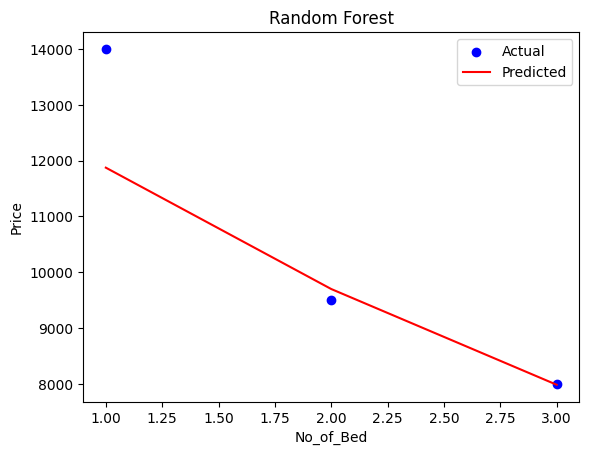

In [9]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Read the dataset
data = pd.read_csv("./Data/PricePredictionData.csv", names=["HostelName", "No_of_Bed", "Ac", "Laundry", "FoodType", "Rating", "Security", "price"])

# Feature engineering
data['Bed_to_Price_Ratio'] = data['No_of_Bed'] / data['price']
data = pd.get_dummies(data, columns=['FoodType'])

# Split the data into train and test sets
X = data.drop(['HostelName', 'price'], axis=1)
y = data['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=10)

# RF training
RF = RandomForestRegressor(random_state=10)
RF.fit(X_train, y_train)

# RF evaluation
y_pred = RF.predict(X_test)
print(RF.score(X_test,y_test))
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
print("Root Mean Squared Error:", rmse)


plt.scatter(X_test["No_of_Bed"], Y_test, color='blue', label='Actual')
plt.plot(X_test["No_of_Bed"], y_pred, color='red', label='Predicted')
plt.xlabel('No_of_Bed')
plt.ylabel('Price')
plt.title('Random Forest')
plt.legend()
plt.show()


In [10]:
def predict_price(No_of_Bed,Ac,Security,FoodType,Rating,Laundry):
    x=np.zeros(len(X.columns))
    x[0]=No_of_Bed
    x[1]=Ac
    x[2]=Security
    x[3]=FoodType
    x[4]=Rating
    x[5]=Laundry

    
    return RF.predict([x])[0]
predict_price(1,1,1,0,4,1)

C:\Users\lahar\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


7007.0

In [11]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Read the dataset
data = pd.read_csv("./Data/PricePredictionData.csv", names=["HostelName", "No_of_Bed", "Ac", "Laundry", "FoodType", "Rating", "Security", "price"])

# Prepare the features and target variable
X = data[["No_of_Bed", "Ac", "Security", "FoodType", "Rating", "Laundry"]]
y = data["price"]

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=10)

# Create a Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)
print(model.score(X_test,y_test))


print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R^2 Score:", r2)
def predict_price(No_of_Bed,Ac,Security,FoodType,Rating,Laundry):
    x=np.zeros(len(X.columns))
    x[0]=No_of_Bed
    x[1]=Ac
    x[2]=Security
    x[3]=FoodType
    x[4]=Rating
    x[5]=Laundry

    
    return model.predict([x])[0]
predict_price(1,1,1,0,4,1)


0.7027512602689361
Mean Squared Error: 1932116.8082519153
Root Mean Squared Error: 1390.006046120633
R^2 Score: 0.7027512602689361


C:\Users\lahar\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


12617.068189426247

In [12]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.metrics import mean_squared_error, r2_score

# Read the dataset
data = pd.read_csv("./Data/PricePredictionData.csv", names=["HostelName", "No_of_Bed", "Ac", "Laundry", "FoodType", "Rating", "Security", "price"])

# Feature Engineering
data["Bed_to_Price_Ratio"] = data["No_of_Bed"] / data["price"]

# Prepare the features and target variable
X = data[["No_of_Bed", "Ac", "Security", "FoodType", "Rating", "Laundry", "Bed_to_Price_Ratio"]]
y = data["price"]

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=10)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Feature Selection
selector = SelectKBest(f_regression, k=5)  # Select top 5 features
X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_test_selected = selector.transform(X_test_scaled)

# Create a Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train_selected, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_selected)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R^2 Score:", r2)


Mean Squared Error: 1906855.7146061317
Root Mean Squared Error: 1380.8894650210536
R^2 Score: 0.7066375823682874


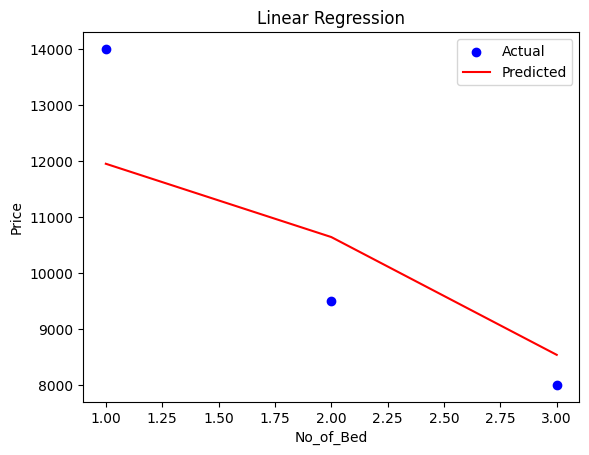

In [13]:
import pandas as pd
import numpy as np
import math
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

data = pd.read_csv("./Data/PricePredictionData.csv", names=["HostelName", "No_of_Bed", "Ac", "Laundry", "FoodType", "Rating", "Security", "price"])

X = data[["No_of_Bed", "Ac", "Security", "FoodType", "Rating", "Laundry"]]
y = data.price

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.1, random_state=10)

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X_train, Y_train)

# Get the predicted prices
y_pred = model.predict(X_test)

# Plot the linear regression line
plt.scatter(X_test["No_of_Bed"], Y_test, color='blue', label='Actual')
plt.plot(X_test["No_of_Bed"], y_pred, color='red', label='Predicted')
plt.xlabel('No_of_Bed')
plt.ylabel('Price')
plt.title('Linear Regression')
plt.legend()
plt.show()
